In [5]:
from Solver.NonlocalSolver import NonlocalSolver
from sklearn.model_selection import ParameterGrid
import numpy as np
import matplotlib.pyplot as plt

In [6]:
dL = lambda y: 2 * (y - 4)
f = lambda x, y: 0.0

In [7]:
param_grid = {'lr': [0.01], 'beta1': [0, 0.9],'beta2': [0.99]}
n_learning_rates = len(param_grid['lr'])
param_list = list(ParameterGrid(param_grid))


Nonlocal Continuous Adam Configuration: {'beta1': 0, 'beta2': 0.99, 'lr': 0.01}
Iteration 0 advanced. Current error: 293.35466914974415.
Iteration 1 advanced. Current error: 196.3364568105584.
Iteration 2 advanced. Current error: 88.47479027782029.
Iteration 3 advanced. Current error: 139.32620477305454.
Iteration 4 advanced. Current error: 185.1676667130986.
Iteration 5 advanced. Current error: 102.76836102767155.
Iteration 6 advanced. Current error: 116.51529755517718.
Iteration 7 advanced. Current error: 200.70027952560042.
Iteration 8 advanced. Current error: 163.33008866253505.
Iteration 9 advanced. Current error: 83.86468077936325.
Iteration 10 advanced. Current error: 123.9830135048104.
Iteration 11 advanced. Current error: 180.21746040643762.
Iteration 12 advanced. Current error: 114.59375342318988.
Iteration 13 advanced. Current error: 72.81410044190854.
Iteration 14 advanced. Current error: 149.72692206199716.
Iteration 15 advanced. Current error: 134.99522396142774.
Iterati

KeyboardInterrupt: 

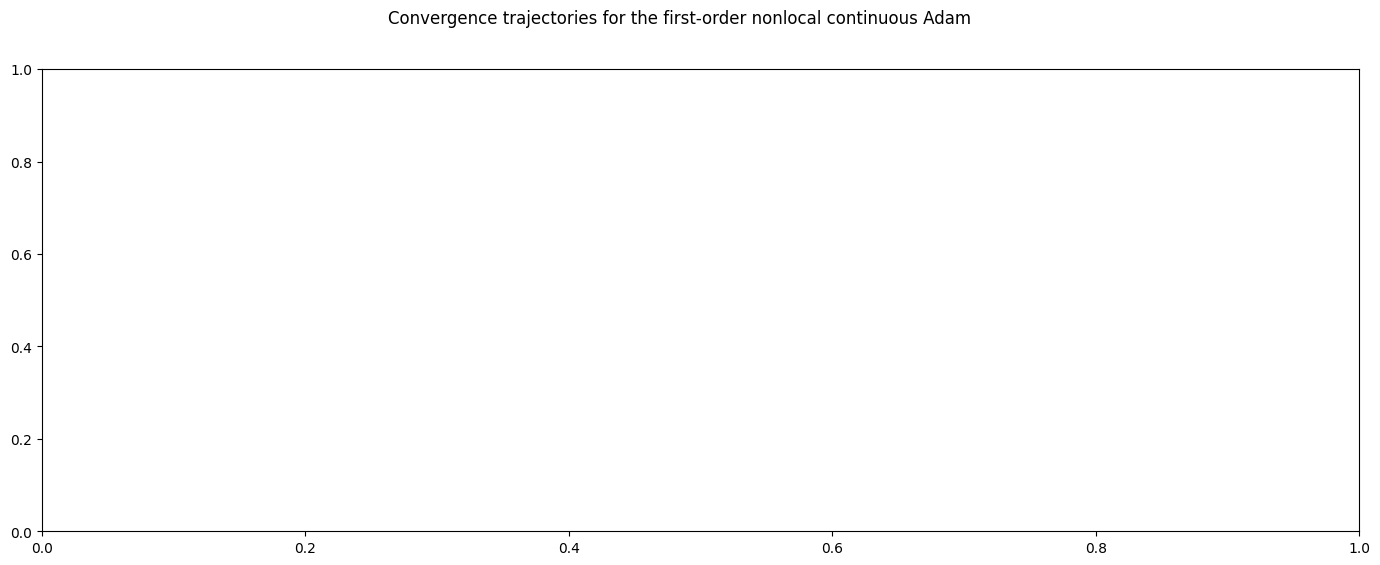

In [8]:
fig, axs = plt.subplots(ncols=n_learning_rates, figsize=(17, 6), sharex=False, sharey=True)   
fig.suptitle('Convergence trajectories for the first-order nonlocal continuous Adam')

for i, lr in enumerate(param_grid['lr']):

    ax = axs[i] if n_learning_rates > 1 else axs
    filtered_params = [p for p in param_list if p['lr'] == lr]

    if lr == 0.1:
        t = [1e-12, 20]
    elif lr == 0.01:
        t = [1e-12, 30]
    elif lr == 0.001:
        t = [1e-12, 50]

    for params in filtered_params:
        print(f'\nNonlocal Continuous Adam Configuration: {params}')
        solver = NonlocalSolver(f=f, dL=dL, t_span=t, y0=np.array([2.0]), alpha=params['lr'],
                                betas=[params['beta1'], params['beta2']])
        t_values, y_values = solver.solve()
        
        label = f"beta1={params['beta1']}, beta2={params['beta2']}"
        ax.plot(t_values, y_values, label=label)
        ax.set_ylabel('Theta value')
        ax.legend(loc = 'best')
        ax.grid(True)
        ax.set_xlim([t[0], t[1]])